In [0]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import sklearn
import numpy as np
import time

In [7]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
test_fshn_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/fashion-mnist_test.csv",sep=",")
train_fshn_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/fashion-mnist_train.csv",sep=",")

In [9]:
print(train_fshn_df.shape)
print(test_fshn_df.shape)

(60000, 785)
(10000, 785)


In [87]:
test_fshn_df.tail()


TypeError: ignored

In [11]:
train_fshn_df.shape

(60000, 785)

In [0]:
train_fshn_df.head()
df_visual=train_fshn_df

In [0]:
training=np.array(train_fshn_df,dtype="float32")

In [0]:
testing=np.array(test_fshn_df,dtype="float32")

In [15]:
training

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [16]:
training.shape

(60000, 785)

In [17]:
testing

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 1., 0.],
       [8., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

29631


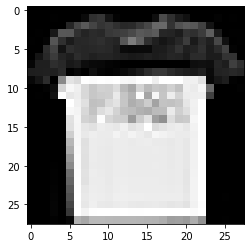

In [18]:
import random
i=random.randint(1,60000)
print(i)
plt.imshow(training[i,1:].reshape(28,28),cmap='gray')

In [19]:


training.shape

(60000, 785)

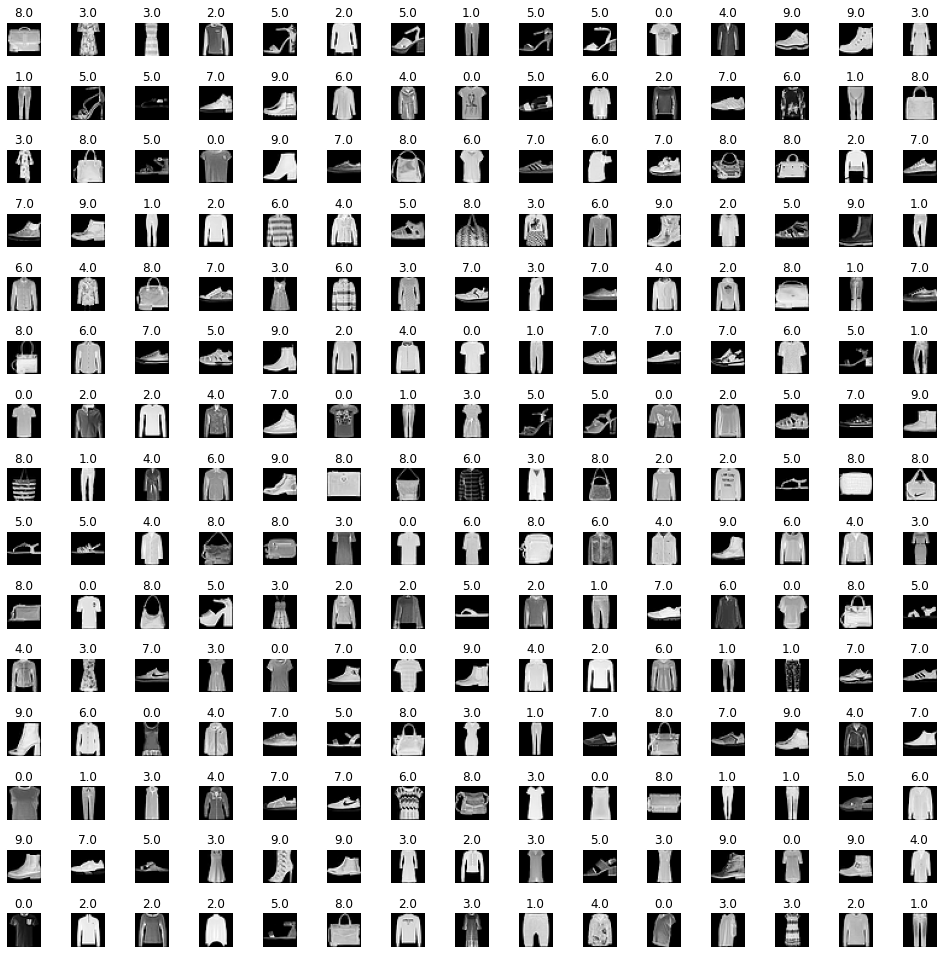

In [20]:
wid=15
hit=15
fig,axes=plt.subplots(hit,wid,figsize=(17,17))
axes=axes.ravel()
L_train=len(training)
for i in range(0, hit*wid):
    ran =random.randint(0,L_train)
    axes[i].imshow(training[ran,1:].reshape(28,28),cmap='gray')
    axes[i].set_title(training[ran,0])
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.9)
    

In [0]:

X_train= training[:,1:]/255
y_train=training[:,0]


In [22]:
print("\nX_train",X_train)
print("\nY_train",y_train)  


X_train [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Y_train [2. 9. 6. ... 8. 8. 7.]


In [23]:
X_test=testing[:,1:]/255
y_test=testing[:,0]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_validate, y_train, y_validate=train_test_split(X_train,y_train, test_size=0.2, random_state=12345)

In [26]:
print(X_train.shape)
print(X_validate.shape)
y_train.shape
#print(y_validate.shape)

(48000, 784)
(12000, 784)


(48000,)

In [27]:
X_train=X_train.reshape(X_train.shape[0],*(28,28,1))
X_test=X_test.reshape(X_test.shape[0],*(28,28,1))
X_validate=X_validate.reshape(X_validate.shape[0],*(28,28,1))
#Y_validate=Y_validate.reshape(Y_validate.shape[0],*(28,28,1))
print(X_train.shape)
print(X_test.shape)
print(X_validate.shape)

(48000, 28, 28, 1)
(10000, 28, 28, 1)
(12000, 28, 28, 1)


In [28]:
import keras

Using TensorFlow backend.


In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,Dense,Dropout,Flatten
from keras.optimizers import Adam
from keras.callbacks import TensorBoard


In [30]:
cnn_model=Sequential()
cnn_model.add(Conv2D(64 ,3 ,3, input_shape=(28,28,1), activation='relu'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  


In [31]:
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Dropout(0.25))
cnn_model.add(Flatten())
cnn_model.add(Dense(output_dim=32, activation="relu"))
cnn_model.add(Dense(output_dim=10, activation="sigmoid"))
cnn_model.compile(loss="sparse_categorical_crossentropy",optimizer=Adam(lr=0.001),metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  """


In [32]:
print(y_test)

[0. 1. 2. ... 8. 8. 1.]


In [33]:
start_time=time.time()
history=cnn_model.fit(X_train,y_train,batch_size=512,nb_epoch=50,verbose=1,validation_data=(X_validate,y_validate))
end_time=time.time()
diff=end_time-start_time
print("Training time: {:.3f}".format(diff)  )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 3s 72us/step - loss: 0.7978 - accuracy: 0.7290 - val_loss: 0.4921 - val_accuracy: 0.8158
Epoch 2/50
48000/48000 [==============================] - 2s 40us/step - loss: 0.4470 - accuracy: 0.8426 - val_loss: 0.4161 - val_accuracy: 0.8540
Epoch 3/50
48000/48000 [==============================] - 2s 40us/step - loss: 0.3998 - accuracy: 0.8602 - val_loss: 0.3777 - val_accuracy: 0.8695
Epoch 4/50
48000/48000 [==============================] - 2s 40us/step - loss: 0.3613 - accuracy: 0.8756 - val_loss: 0.3501 - val_accuracy: 0.8792
Epoch 5/50
48000/48000 [==============================] - 2s 40us/step - loss: 0.3422 - accuracy: 0.8810 - val_loss: 0.3397 - val_accuracy: 0.8856
Epoch 6/50
48000/48000 [==============================] - 2s 40us/step - loss: 0.3251 - accuracy: 0.8871 - val_loss: 0.3150 - val_accuracy: 0.8903
Epoch 7/50
48000/48000 [==============================] - 2s 40us/st

In [34]:
accuracy=cnn_model.evaluate(X_test,y_test)
print(accuracy[1])
print("Test accuracy : {:.3f}".format(accuracy[1]))

10000/10000 [==============================] - 1s 61us/step
0.9207000136375427
Test accuracy : 0.921


In [0]:
import numpy
import seaborn as sn


In [0]:
prid_df=cnn_model.predict_classes(X_test)

In [37]:
print(prid_df)

[0 1 2 ... 8 8 1]


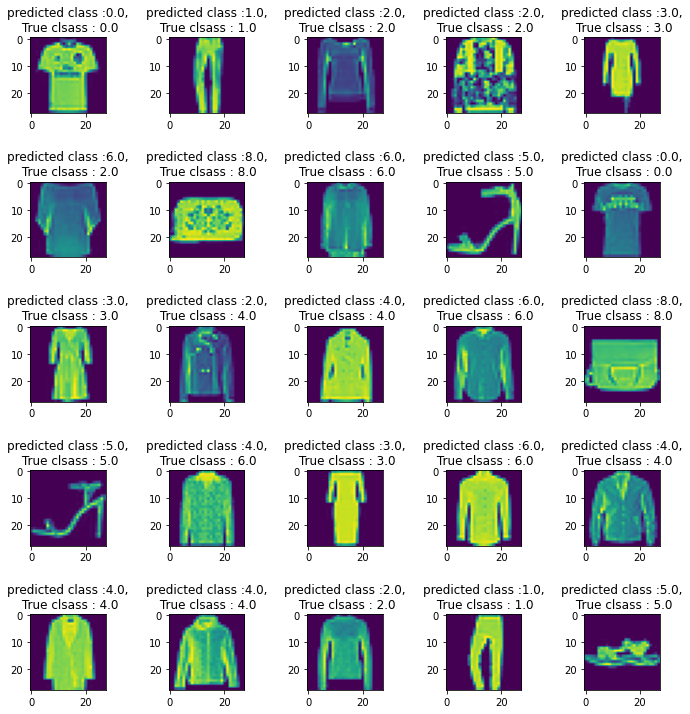

In [38]:
k=5
m=5
f,ax=plt.subplots(k,m,figsize= (12,12))
ax=ax.ravel()
for i in range(25):
  ax[i].imshow(X_test[i].reshape(28,28))
  ax[i].set_title("predicted class :{:.1f},\n True clsass : {:.1f}".format(prid_df[i], y_test[i]))
f.subplots_adjust(hspace=0.9)


In [0]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,accuracy_score

[[895   2  12  15   1   0  64   1  10   0]
 [  3 987   1   7   0   0   1   0   1   0]
 [ 17   2 842  13  62   0  64   0   0   0]
 [ 15  11   6 924  28   0  16   0   0   0]
 [  2   0  23  19 914   0  41   0   1   0]
 [  0   1   0   0   0 975   0  12   1  11]
 [120   2  36  30  46   0 764   0   2   0]
 [  0   0   0   0   0  10   0 957   0  33]
 [  1   1   1   2   3   2   9   2 979   0]
 [  0   0   0   0   0   4   0  26   0 970]]


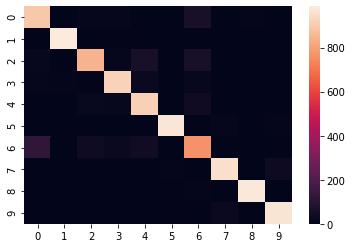

In [55]:
cm=confusion_matrix(y_test,prid_df)
print(cm)
cm.shape
sn.heatmap(cm)

In [0]:
from sklearn.metrics import classification_report

In [44]:
print(classification_report(y_test,prid_df))

              precision    recall  f1-score   support

         0.0       0.85      0.90      0.87      1000
         1.0       0.98      0.99      0.98      1000
         2.0       0.91      0.84      0.88      1000
         3.0       0.91      0.92      0.92      1000
         4.0       0.87      0.91      0.89      1000
         5.0       0.98      0.97      0.98      1000
         6.0       0.80      0.76      0.78      1000
         7.0       0.96      0.96      0.96      1000
         8.0       0.98      0.98      0.98      1000
         9.0       0.96      0.97      0.96      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [0]:
from sklearn.model_selection import cross_val_score


In [0]:
dataframe1=pd.DataFrame(prid_df, columns=['Predicted_values']) 

In [0]:
y_test2=[]

In [0]:
for i in y_test1:
  y_test2.append(int(i))

In [0]:
dataframe1['orginal_values']=y_test2

In [124]:
dataframe1.head(20)

,Predicted_values,orginal_values
0,0,0
1,1,1
2,2,2
3,2,2
4,3,3
5,6,2
6,8,8
7,6,6
8,5,5
9,0,0


In [0]:
dataframe1.to_csv('Comparision_results.csv') 